In [32]:
from tensorflow import keras
from keras import Model
import os
import cv2
import numpy as np
from keras.preprocessing import image
# model = keras.models.load_model('eficientnetb0-03-acc_0.61.hdf5')
# #or use
model = keras.models.load_model('Baseline.hdf5')
t_model = Model(model.input,model.output)
model=t_model

In [33]:
import os
import numpy as np
import cv2

def preprocess_img(img):
    img=img.astype(np.uint8)
    equ=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l2 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))  # merge channels
    img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
#     cv2.imwrite(".\\res\\"+str(uuid.uuid4())+".jpg", equ)
    return equ.astype(np.float32)

def read_images(path):
    img=cv2.imread(path)
#     print(img)
    resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    resized=preprocess_img(resized)
#     print("preproc",resized)
    return resized

In [34]:
mels=os.listdir(".\\train\\MEL\\")
bcc=os.listdir(".\\train\\BCC\\")
bkl=os.listdir(".\\train\\BKL\\")
labels = []
from tqdm import tqdm
results=np.zeros((1,2048))
for i in tqdm(range(0,len(mels))):
    matr=read_images(".\\train\\MEL\\"+mels[i])
    res=t_model.predict(np.array(matr[None,...]))
    results=np.append(results,res,axis=0)
    labels.append("MEL")
results=results[1:,:]
for i in tqdm(range(0,len(mels))):
    matr=read_images(".\\train\\BCC\\"+bcc[i])
    res=t_model.predict(np.array(matr[None,...]))
    results=np.append(results,res,axis=0)
    labels.append("BCC")
for i in tqdm(range(0,len(mels))):
    matr=read_images(".\\train\\BKL\\"+bkl[i])
    res=t_model.predict(np.array(matr[None,...]))
    results=np.append(results,res,axis=0)
    labels.append("BKL")


100%|██████████| 2624/2624 [05:02<00:00,  8.68it/s]


In [35]:
print(results.shape,results,labels,len(labels))

(7872, 2048) [[ 8.41256332  2.48958826  3.17622161 ...  0.89770001  0.33919573
   2.50929022]
 [ 1.05659437  0.19111198  8.05925083 ...  1.35832262  0.36286223
   0.        ]
 [13.73536301  1.02254629  3.07672882 ...  6.53484774  2.79831719
   1.2912575 ]
 ...
 [ 7.78062391  1.87730908  0.         ...  3.96235538  1.90165949
   0.        ]
 [ 2.56591392  4.86079979  0.58239388 ...  1.38822901  3.00969219
   1.16480291]
 [ 0.86389601  5.92804289  3.13621712 ...  1.12203014  0.09488087
   0.06587763]] ['MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL

C:\Users\bazif\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bazif\anaconda3\envs\TensorflowGPU\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\bazif\anaconda3\envs\TensorflowGPU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


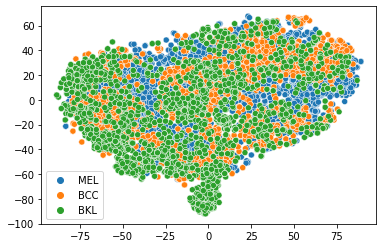

In [37]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
tsne = TSNE()
# print(X_embedded.shape,condensed.shape,condensed[:,-1].shape)
X_embedded = tsne.fit_transform(results[:,:])

scatter_plt=sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels, legend='full')
scatter_plt.get_figure().savefig("adam.png") 